# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_multi.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from ppo import run_ppo

run_ppo(env)

update 1/100. Last update in 3.814697265625e-06s
last 100 returns: 0.6329999858513474
update 2/100. Last update in 36.0647292137146s
last 100 returns: 0.584624986932613
update 3/100. Last update in 34.78214979171753s
last 100 returns: 0.5266999882273375
update 4/100. Last update in 35.277939796447754s
last 100 returns: 0.5726999871991575
update 5/100. Last update in 35.02548885345459s
last 100 returns: 0.641299985665828
update 6/100. Last update in 34.81574296951294s
last 100 returns: 0.7251999837905169
update 7/100. Last update in 34.779857873916626s
last 100 returns: 0.865799980647862
update 8/100. Last update in 34.66656017303467s
last 100 returns: 0.9935999777913094
update 9/100. Last update in 35.55491876602173s
last 100 returns: 0.9385999790206552
update 10/100. Last update in 35.57433009147644s
last 100 returns: 1.069599976092577
update 11/100. Last update in 35.64298701286316s
last 100 returns: 1.1532999742217362
update 12/100. Last update in 35.67920684814453s
last 100 returns

last 100 returns: 39.20269912375137
update 98/100. Last update in 35.68975281715393s
last 100 returns: 39.16449912460521
update 99/100. Last update in 35.65200996398926s
last 100 returns: 39.16969912448898
update 100/100. Last update in 36.80899214744568s
last 100 returns: 39.22379912327975


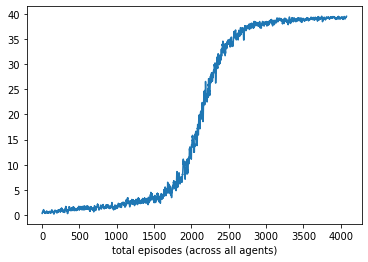

In [7]:
def copy_model_and_plot_learning_curve():
    import pickle
    import matplotlib.pyplot as plt
    from collections import deque
    import os
    import datetime
    import shutil
    
    datetime_stamp = datetime.datetime.now().strftime('%y%m%d_%H%M')
    plot_path = f'checkpoints/{datetime_stamp}'
    
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    else:
        print(f'directory {plot_path} already exists')
        return
    
    shutil.copyfile('scores.pickle', f'{plot_path}/scores.pickle')
    shutil.copyfile('model_checkpoint.pickle', f'{plot_path}/model.pickle')

    with open(f'{plot_path}/scores.pickle', 'rb') as f:
        total_rewards = pickle.load(f)

    smoothed = []
    queue = deque([], maxlen=10)
    for r in total_rewards:
        queue.append(r)
        smoothed.append(sum(queue)/len(queue))
    fig,ax = plt.subplots()
    ax.plot(smoothed)
    ax.set_xlabel('total episodes (across all agents)')
    plt.savefig(f'{plot_path}/learning_curve.png')
    plt.show()
copy_model_and_plot_learning_curve()

In [8]:
# Function to run agents after training

def run_agents(model_path):
    from ppo_agent import Agent
    from ppo import HIDDEN_LAYER_SIZE

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]
    num_agents = len(env_info.agents)
    n_observations = env_info.vector_observations.shape[1]
    n_actions = brain.vector_action_space_size
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    

    agent = Agent(n_observations, n_actions, HIDDEN_LAYER_SIZE)
    agent.load_state_dict(torch.load(model_path))

    scores = np.zeros(num_agents)
    while True:
        obs = torch.Tensor(env_info.vector_observations)
        with torch.no_grad():
            actions, _ = agent.pi(obs)
        env_info = env.step(actions.cpu().numpy())[brain_name]           # send all actions to the environment
        scores += np.array(env_info.rewards)                         # update the score (for each agent)
        if np.any(env_info.local_done):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
run_agents('model_checkpoint.pickle')

Total score (averaged over agents) this episode: 39.32249912107363


In [9]:
env.close()